# Logistic Regression

Problem Statement : Output variable ->
y -> Whether the client has subscribed a term deposit or not , Binomial("yes"or "no")

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("/content/bank-full.csv" ,error_bad_lines=False, sep=';',engine="python")
df.head(5)

<ipython-input-26-bd2a254a3870>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/bank-full.csv" ,error_bad_lines=False, sep=';',engine="python")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [28]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [29]:
df.shape

(45211, 17)

In [30]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
df.duplicated().sum()

0

## Use get.dummies to convert all object tables into numbers using get dummies .

In [32]:
df= pd.get_dummies(df, columns=['job','marital','education','contact','poutcome','month', 'default', 'housing', 'loan','y'], drop_first=True)
df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [34]:
x= df.iloc[:,0:42]
y= df['y_yes']

In [35]:
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

## Now split data using train_test_split

In [37]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.80, random_state=100)

In [50]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes
20017,31,2,8,848,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31835,41,1521,8,46,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
41232,59,474,21,252,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10704,38,1116,16,406,2,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
13670,41,74,9,193,4,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,25,937,23,115,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
79,55,1,5,208,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
12119,54,1033,20,152,3,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
14147,44,71,11,251,2,-1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [51]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_yes,housing_yes,loan_yes
14789,45,0,16,154,2,-1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
8968,41,5,5,178,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34685,40,906,5,67,4,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2369,25,768,13,203,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
36561,37,0,12,631,1,344,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43670,44,618,12,193,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16015,37,0,22,272,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3284,47,3216,15,451,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
44963,37,1403,9,14,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Model Building

In [40]:
from sklearn.linear_model import LogisticRegression

In [102]:
model = LogisticRegression()

In [103]:
# train model
model.fit(x_train,y_train)

LogisticRegression()

## check accuracy score

In [104]:
## check model accuracy score
print(model.score(x_test,y_test))

0.891850049762247


## Create Prediction Model

In [105]:
y_pred = model.predict(x_test)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [64]:
len(x_test)

9043

In [65]:
len(y_pred)

9043

## prediction

In [106]:
age = int(input("Enter the number of rows which wants to be predicted : "))

#print("Acctual Y   : " , y_test[:35].values) ### 35 indicates first 35 rows

print("Acctual Y   : " , y_test[:age].values)

print("Predicted Y : ",y_pred[:age])

Enter the number of rows which wants to be predicted : 5
Acctual Y   :  [0 0 0 0 0]
Predicted Y :  [0 0 0 0 1]


## Classification Report

In [107]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9981
           1       0.61      0.23      0.33      1322

    accuracy                           0.89     11303
   macro avg       0.76      0.60      0.64     11303
weighted avg       0.87      0.89      0.87     11303



## confusion matrix

In [96]:
print(confusion_matrix(ytest, ypred))

[[9787  194]
 [1021  301]]


## Visualize Confusion Matrix

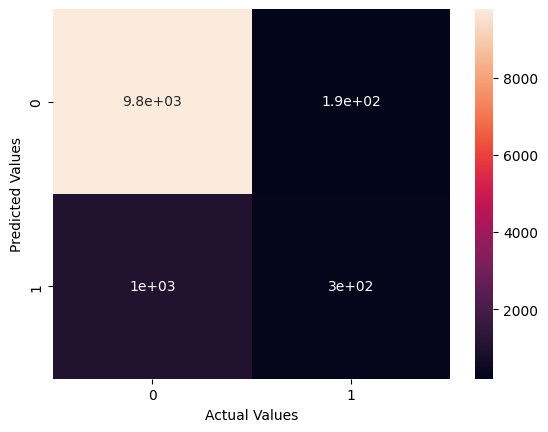

In [112]:
sns.heatmap(confusion_matrix(ytest, ypred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()